In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/License-Plate-Recognition

/content/drive/MyDrive/License-Plate-Recognition


In [ ]:
pip install -r ./requirement.txt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from PIL import Image
import cv2
import torch
import math
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

In [ ]:
#cell 1
#load model
license_plate_detect_path = '/content/drive/MyDrive/License-Plate-Recognition/custom_model/LP_detection.pt'
ocr_path = '/content/drive/MyDrive/License-Plate-Recognition/custom_model/OCR.pt'
LP_detector = torch.hub.load('yolov5', 'custom', path = license_plate_detect_path, force_reload=True, source='local')
LP_ocr = torch.hub.load('yolov5', 'custom', path = ocr_path, force_reload=True, source='local')

YOLOv5 🚀 v7.0-342-g12be4996 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5 🚀 v7.0-342-g12be4996 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20970123 parameters, 0 gradients, 48.2 GFLOPs
Adding AutoShape... 


In [ ]:
#cell 2
# set model confidence threshold
LP_detector.conf = 0.75 # chi nhan dang bien so co do chinh xac > 75%
LP_ocr.conf = 0.85 # chi nhan dang cac ki tu co do chinh xac > 85%

In [ ]:
#cell 3
img_path = '/content/drive/MyDrive/License-Plate-Recognition/test_image/117.jpg'
img = cv2.imread(img_path)
plates = LP_detector(img, size=320) #set img size = 320

In [ ]:
#cell 4
#source code: https://github.com/trungdinh22/License-Plate-Recognition
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(LP_detector,img)
    if lp != 'unknown':
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite('crop.jpg', crop_img)
        rc_image = cv2.imread('crop.jpg')
        lp = ''
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(LP_ocr, utils_rotate.deskew(crop_img, cc, ct))
                if lp != 'unknown' and len(lp) >= 8 and len(lp) <= 10:
                    list_read_plates.add(lp)
                    cv2.putText(img, lp, (int(plate[0]), int(plate[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (36,255,12), 2)
                    flag = 1
                    break
            if flag == 1:
                break
    cv2.imwrite('result.png', img)


{'18B2-54779', '89L-38424', '29V-37694'}


<ipython-input-41-e628922acf89>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


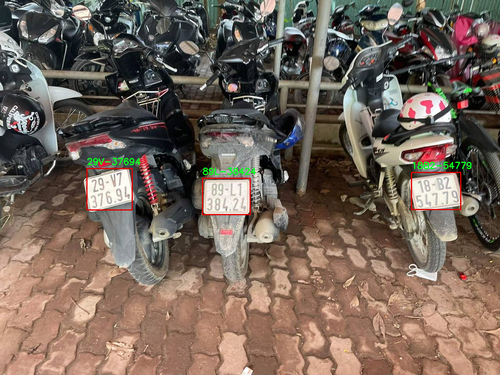

In [ ]:
#cell 5
print(list_read_plates)
img = Image.open('/content/drive/MyDrive/License-Plate-Recognition/result.png')
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

In [ ]:
!unzip /content/drive/MyDrive/License-Plate-Recognition/custom_model.zip

Archive:  /content/drive/MyDrive/License-Plate-Recognition/custom_model.zip
  inflating: custom_model/LP_detection.pt  
  inflating: custom_model/OCR.pt     
